## 市场相关性分析

In [1]:
import pymongo
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

C:\Users\channelchan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\channelchan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', 

In [2]:
symbolList = ['btc_usdt.spot:binance', 'eth_usdt.spot:binance', 'bnb_usdt.spot:binance', 'ltc_usdt.spot:binance','bch_usdt.spot:binance',
             'doge_usdt.spot:binance', 'matic_usdt.spot:binance', 'sol_usdt.spot:binance','link_usdt.spot:binance','uni_usdt.spot:binance']

client = pymongo.MongoClient('172.16.20.81', 27017)

In [3]:
def readDb(collection, start, end):
    return pd.DataFrame(
        list(collection.find({"datetime": {'$gt': start, '$lt': end}}))
    )

In [4]:
startTime = datetime(2022,6,1)
endTime = datetime(2023,1,6)
dbClient = client['Kline_1Min_Auto_Db_Plus']
columnsName = ['open', 'high', 'low', 'close', 'volume','datetime']

In [5]:
crytoDict = {
                'btc':readDb(dbClient[symbolList[0]], start=startTime , end=endTime)[columnsName],
                'eth':readDb(dbClient[symbolList[1]], start=startTime , end=endTime)[columnsName],
                'bnb':readDb(dbClient[symbolList[2]], start=startTime , end=endTime)[columnsName],
                'ltc':readDb(dbClient[symbolList[3]], start=startTime , end=endTime)[columnsName],
                'bch':readDb(dbClient[symbolList[4]], start=startTime , end=endTime)[columnsName],
                'doge':readDb(dbClient[symbolList[5]], start=startTime , end=endTime)[columnsName],
                'matic':readDb(dbClient[symbolList[6]], start=startTime , end=endTime)[columnsName],
                'sol':readDb(dbClient[symbolList[7]], start=startTime , end=endTime)[columnsName],
                'link':readDb(dbClient[symbolList[8]], start=startTime , end=endTime)[columnsName],
                'uni':readDb(dbClient[symbolList[9]], start=startTime , end=endTime)[columnsName],
            }

In [6]:
# crytoDict

In [7]:
def resampleDf(data, freq='H'):
#     df = data.drop('_id', axis=1)
    dataDf = df.set_index('datetime')
    dataHourDf = dataDf.resample(freq).agg({'open':'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume':'sum'})
    dataResetDf = dataHourDf.reset_index()
    return dataResetDf

In [8]:
def addSymbol(dataDf, symbolName):
    dataDf['symbol'] = symbolName
    return dataDf

In [9]:
def setIndex(dataDf):
    dataIndex = dataDf.set_index(['datetime', 'symbol'])
    return dataIndex

In [10]:
multiCryptoDict = {}
for key, df in crytoDict.items():
    hourDf = resampleDf(df)
    hourSymbolDf = addSymbol(hourDf, key)
    hourIndexDf = setIndex(hourSymbolDf)
    multiCryptoDict[key] = hourIndexDf

In [11]:
multiDf = pd.concat(list(multiCryptoDict.values())).sort_index()

In [12]:
multiDf

open         high          low  \
datetime            symbol                                          
2022-06-01 00:00:00 bch       198.00000    199.30000    195.60000   
                    bnb       321.90000    324.00000    319.70000   
                    btc     32084.53000  32399.00000  31839.67000   
                    doge        0.08562      0.08623      0.08483   
                    eth      1990.01000   1999.87000   1961.29000   
...                                 ...          ...          ...   
2023-01-05 23:00:00 link        5.71000      5.73800      5.69900   
                    ltc        74.08000     74.60000     74.02000   
                    matic       0.79020      0.79570      0.78960   
                    sol        13.17000     13.40000     13.15000   
                    uni         5.41500      5.45000      5.40100   

                                  close        volume  
datetime            symbol                             
2022-06-01 00:00:00 bch       197.00000  5.910073e+03  
                    bnb       322.80000  4.378702e+04  
                    btc     32158.03000  5.899671e+03  
                    doge        0.08574  8.556392e+07  
                    eth      1973.15000  5.528846e+04  
...                                 ...           ...  
2023-01-05 23:00:00 link        5.71800  1.125516e+05  
                    ltc        74.37000  2.693517e+04  
                    matic       0.79150  2.211048e+06  
                    sol        13.29000  3.035376e+05  
                    uni         5.40400  2.212952e+04  

[52560 rows x 5 columns]

In [13]:
closePrice = multiDf['close'].unstack()

In [14]:
logPriceDf = np.log(closePrice)

In [15]:
logPriceDf

symbol,bch,bnb,btc,doge,eth,link,ltc,matic,sol,uni
datetime,,,,,,,,,,
2022-06-01 00:00:00,5.283204,5.777033,10.378417,-2.456436,7.587387,2.014903,4.229749,-0.403467,3.834061,1.750937
2022-06-01 01:00:00,5.284725,5.778271,10.377299,-2.454688,7.584468,2.010895,4.231204,-0.400478,3.832763,1.750937
2022-06-01 02:00:00,5.278625,5.767070,10.363533,-2.456203,7.567625,1.998774,4.212128,-0.420071,3.816833,1.728109
2022-06-01 03:00:00,5.285739,5.764564,10.361726,-2.453059,7.567454,1.998774,4.218036,-0.420071,3.818371,1.726332
2022-06-01 04:00:00,5.303802,5.769258,10.367651,-2.447380,7.577460,2.018895,4.226834,-0.410980,3.825157,1.738710
...,...,...,...,...,...,...,...,...,...,...
2023-01-05 19:00:00,4.627910,5.549465,9.731132,-2.610470,7.135441,1.743969,4.318021,-0.223519,2.584752,1.695983
2023-01-05 20:00:00,4.625953,5.548298,9.730451,-2.613468,7.133232,1.741343,4.317221,-0.225020,2.582487,1.694330
2023-01-05 21:00:00,4.615121,5.544396,9.727958,-2.624445,7.128897,1.736247,4.304470,-0.233068,2.574138,1.685473


In [16]:
periodParam = 7

In [17]:
corrEthBtc = logPriceDf['btc'].rolling(168).corr(logPriceDf['eth'])

In [18]:
corrEthBtc.plot()

<AxesSubplot:xlabel='datetime'>

In [19]:
corrBnbBtc = logPriceDf['btc'].rolling(168).corr(logPriceDf['bnb'])

<AxesSubplot:xlabel='datetime'>

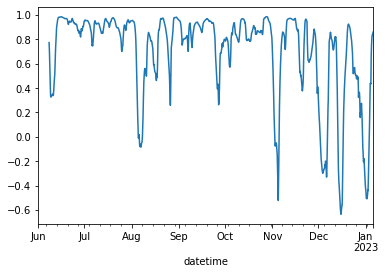

In [20]:
corrBnbBtc.plot()

In [21]:
def absorption_ratio(logReturn):
    '''
    Calculate absorption ratio via PCA.
    Arguments:
    explained_variance -- 1D np.array of explained variance by each pricincipal component, in descending order
    
    n_components -- an integer, a number of principal components to compute absorption ratio
    
    Return:
    ar -- absorption ratio
    '''
    num = len(logReturn[0])
    pca = PCA(n_components=num)
    pca.fit(logReturn)
    explained_variance1 = pca.explained_variance_ratio_[0]
    explained_variance_sum = np.sum(pca.explained_variance_ratio_)
    ar = explained_variance1/ explained_variance_sum
    return ar

In [22]:
# logPriceDf.tail()

In [23]:
ar_param = 168
pcaDict = {}
for i in range(len(logPriceDf)-ar_param):
    pcaDict[logPriceDf.iloc[i+ar_param].name] = absorption_ratio(np.array(logPriceDf.iloc[i:i+ar_param]))

<AxesSubplot:>

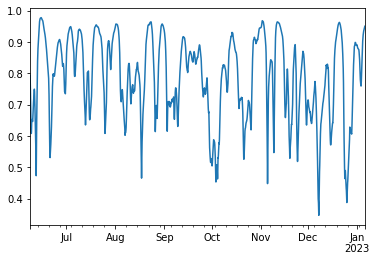

In [24]:
pd.Series(pcaDict).plot()